***
<label>TO DO Tasks</label>
<ul>
    <input type="checkbox"> Trabalhar mais na escala de crescimento dos salários registrados na plataforma <br>
    <input type="checkbox"> Trabalhar nos graficos dos salarios pagos <br>
</ul>

***

# About Notebook
sndkfnsdkjfnksdjkfnsdkjfnksndkjfsdkfnsf

***

## About [ai-jobs.net](https://ai-jobs.net/)

<p style='text-align: justify;'> This site collects salary information anonymously from professionals all over the world in the AI/ML/Data Science space and makes it publicly available for anyone to use, share and play around with. </p>

<p style='text-align: justify;'> The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions. </p>

# Installing Packages
Remove the comments if you need to install the frameworks

In [177]:
# !pip install pandas
# !pip missingo
# !pip install seaborn
# !pip install matplotlib
# !pip install plotly 
!pip install pycountry
!pip install pycountry-converter
!pip install wordcloud

ERROR: Could not find a version that satisfies the requirement pycountry-converter (from versions: none)
ERROR: No matching distribution found for pycountry-converter


# Libraries

In [178]:
try:
    # Librarie for data manipulation and analysis
    import pandas as pd
    import numpy as np

    # Libraries for data visualization
    import plotly.graph_objs as go
    from plotly.subplots import make_subplots
    import plotly.io as pio
    import plotly.colors as colors
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    from IPython.display import HTML
    

    # Libraries for provide algorithms
    from scipy.stats import gaussian_kde

    import pycountry as pyc
    import pycountry_convert as pc


except:
    print("Necessary install dependecy libraries")
    

# Load data
The dataset is provided via a web request, so every time this notebook is executed, the data is updated.

In [179]:
dataset_link = "https://ai-jobs.net/salaries/download/salaries.csv"
df = pd.read_csv(dataset_link)
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Research Scientist,220000,USD,220000,US,50,US,L
1,2022,EN,FT,Machine Learning Engineer,54000,CHF,56536,CH,100,CH,S
2,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
3,2023,SE,FT,Data Scientist,120000,USD,120000,US,0,US,M
4,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M


# Data Information

In [180]:
# attributes
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

The attributes will be explained individually in the chapter on univariate analysis."

In [181]:
# concise summary of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3642 non-null   int64 
 1   experience_level    3642 non-null   object
 2   employment_type     3642 non-null   object
 3   job_title           3642 non-null   object
 4   salary              3642 non-null   int64 
 5   salary_currency     3642 non-null   object
 6   salary_in_usd       3642 non-null   int64 
 7   employee_residence  3642 non-null   object
 8   remote_ratio        3642 non-null   int64 
 9   company_location    3642 non-null   object
 10  company_size        3642 non-null   object
dtypes: int64(4), object(7)
memory usage: 313.1+ KB


We can notice that we have both categorical and numerical variables in this dataframe. We will separate the analyses for both cases.

<div style="display: flex; justify-content: center;">
    <table>
        <thead>
            <tr>
                <th>Categorical Attributes</th>
                <th>Numerical Attributes</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>experience_level</td>
                <td>work_year</td>
            </tr>
            <tr>
                <td>employment_type</td>
                <td>salary</td>
            </tr>
            <tr>
                <td>job_title</td>
                <td>salary_currency</td>
            </tr>
            <tr>
                <td>employee_residence</td>
                <td>salary_in_usd</td>
            </tr>
            <tr>
                <td>company_location</td>
                <td>remote_ratio</td>
            </tr>
            <tr>
                <td>company_size</td>
                <td></td>
            </tr>
        </tbody>
    </table>
</div>


In [182]:
# checking for null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [183]:
# Categorical attributes [object]
categorical_df = df.loc[
    :,
    [
        "experience_level",
        "employment_type",
        "job_title",
        "salary_currency",
        "employee_residence",
        "company_location",
        "company_size",
    ],
]

# Numerical Attributes [int64]
numerical_df = df.loc[
    :, ["work_year", "salary", "salary_currency", "salary_in_usd", "remote_ratio"]
]

# Univariate Analysis

## Categorical Attributes

### experience_level: The experience level in the job during the year

In [184]:
# experience levels
df["experience_level"].unique()

array(['EN', 'SE', 'MI', 'EX'], dtype=object)

 - EN Entry-level / Junior
 - MI Mid-level / Intermediate
 - SE Senior-level / Expert
 - EX Executive-level / Director

In [186]:
# experience levels count according the exeprience level
experience_levels = ["EN", "MI", "SE", "EX"]

freq = df["experience_level"].value_counts().reindex(experience_levels).values

# Criar o gráfico de rosca
fig = go.Figure(
    go.Pie(
        labels=["Junior", "Intermediate", "Expert", "Director"],
        values=freq,
        hole=0.5, # define o tamanho do furo no meio
        marker=dict(colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']), # define as cores das fatias
    )
)

# Adicionar título
fig.update_layout(title='Nível de Experiência dos Profissionais')


# Mostrar o gráfico
fig.show()

### employment_type: The type of employement for the role

In [187]:
# employment type
df["employment_type"].unique()

array(['FT', 'FL', 'PT', 'CT'], dtype=object)

 - PT: Part-time
 - FT: Full-time
 - CT: Contract
 - FL: Freelance

In [188]:
# employment type acccording sort by number
df["employment_type"].value_counts().sort_values()

CT       8
FL      10
PT      17
FT    3607
Name: employment_type, dtype: int64

In [189]:
employment_type = ["PT", "FT", "CT", "FL"]

freq = df["employment_type"].value_counts().reindex(employment_type).values

# Criar o gráfico de rosca
fig = go.Figure(
    go.Pie(
        labels=["Part-time", "Full-time", "Contract", "Freelance"],
        values=freq,
        hole=0.5, # define o tamanho do furo no meio
        marker=dict(colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']), # define as cores das fatias
    )
)

# Adicionar título
fig.update_layout(title='Nível de Experiência dos Profissionais')


# Mostrar o gráfico
fig.show()

### job_title: The role worked in during the year.

In [190]:
df["job_title"].unique()

array(['Research Scientist', 'Machine Learning Engineer',
       'Data Scientist', 'Analytics Engineer', 'Data Engineer',
       'Data Analytics Manager', 'Data Analyst', 'Business Data Analyst',
       'Applied Data Scientist', 'Applied Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Research Engineer',
       'Data Architect', 'Data DevOps Engineer',
       'Computer Vision Engineer', 'AI Developer', 'Head of Data',
       'Data Quality Analyst', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Scientist', 'Lead Data Scientist',
       'Cloud Database Engineer', 'Financial Data Analyst',
       'Data Infrastructure Engineer', 'ML Engineer',
       'Software Data Engineer', 'AI Programmer',


There are numerous job titles for professionals in the data field. At this point, we could adopt a technique to categorize these titles into groups. To simplify, we will only analyze the titles with the highest occurrence.

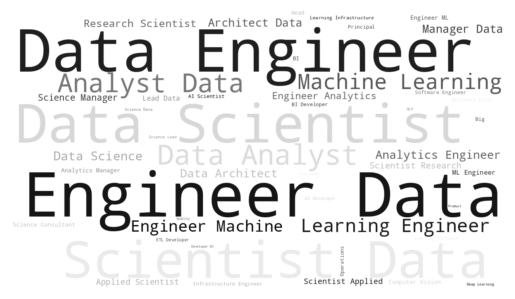

In [247]:
import matplotlib.colors as mcolors

# Cria a paleta de cores
cmap = mcolors.LinearSegmentedColormap.from_list('black_to_white', ['#000000', '#ffffff'])

# Cria um objeto WordCloud com as palavras do array e a paleta de cores personalizada
nuvem_palavras = WordCloud(background_color='white', width=1280, height=720, colormap=cmap, max_words=50).generate(' '.join(palavras))

# Cria o gráfico
fig, ax = plt.subplots()
ax.imshow(nuvem_palavras, interpolation='bilinear')
ax.axis("off")
plt.show()


In [224]:
jobs_title = df["job_title"].value_counts().sort_values(ascending=False)

# top jobs
top_jobs_labels = jobs_title.index.values[:5].tolist()
top_jobs_values = jobs_title.values[:5].tolist()

# sum of total jobs registered
total = sum(jobs_title.values)

# sum of other jobs
others = sum(jobs_title.values[5:])

jobs_values = top_jobs_values + [others]
jobs_labels = top_jobs_labels + ["Others"]

jobs = dict(zip(jobs_labels, jobs_values))

# Ordenar o dicionário pelos valores em ordem crescente
jobs_ordered = dict(sorted(jobs.items(), key=lambda item: item[1], reverse=True))

# Cria um objeto Pie para o gráfico de donut
data = [
    go.Pie(
        labels=list(jobs_ordered.keys()),
        values=list(jobs_ordered.values()),
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Cria a anotação com o valor total
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Cria o layout do gráfico
layout = go.Layout(
    title={
        'text': "Top jobs of professionals in the data career",
        'x': 0.5,
        'xanchor': 'center'
    },
    width=600,
    height=600,
    annotations=[annotation],
)

# Cria a figura do gráfico
fig = go.Figure(data=data, layout=layout)

fig.show()

### employee_residence

In [193]:
df["employee_residence"].unique()

array(['US', 'CH', 'IN', 'GB', 'CF', 'NG', 'FR', 'CA', 'AU', 'FI', 'ES',
       'UA', 'IE', 'NL', 'IL', 'GH', 'DE', 'AT', 'CO', 'SG', 'SE', 'SI',
       'MX', 'UZ', 'BR', 'PT', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY', 'AR',
       'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'LT',
       'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL', 'PR',
       'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE', 'HN',
       'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'HK', 'MD', 'LU',
       'MT'], dtype=object)

In [194]:
df["employee_residence"].value_counts().sort_values(ascending=False)[0:10]

US    2912
GB     165
CA      79
ES      77
IN      68
DE      46
FR      38
BR      18
PT      17
GR      16
Name: employee_residence, dtype: int64

In [195]:
def country_to_continent(country_code):
    if not isinstance(country_code, str) or len(country_code) != 2:
        raise ValueError(
            "Input inválido. O código de país deve ser uma string com dois caracteres."
        )
    country_alpha2 = country_code
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    #country_continent_name = pc.convert_continent_code_to_continent_name(
    #    country_continent_code
    #)
    return country_continent_code

    

# Categorizar o país de cada cientista de dados e adicionar uma nova coluna ao DataFrame
def categorize_country(country_code):
    try:
        return pyc.countries.get(alpha_2=country_code).alpha_3
    except:
        return "Unknown"

In [196]:
df["employee_residence"].apply(country_to_continent).value_counts().sort_values(
    ascending=False
)

NA    3009
EU     455
AS     116
SA      33
AF      15
OC      14
Name: employee_residence, dtype: int64

In [197]:
df["employee_residence"].apply(categorize_country).value_counts().sort_values(
    ascending=False
)

USA    2912
GBR     165
CAN      79
ESP      77
IND      68
       ... 
MDA       1
LUX       1
EST       1
SVK       1
MLT       1
Name: employee_residence, Length: 78, dtype: int64

In [198]:
# Agrupar o DataFrame por país e contar o número de cientistas de dados em cada um
countries = []
scientists = []
for country, data in df.groupby("employee_residence"):
    total_scientists = data.shape[0]
    countries.append(categorize_country(country))
    scientists.append(total_scientists)

# Criar a visualização do mapa
data = go.Choropleth(
    locations=countries,
    z=scientists,
    locationmode="ISO-3",
    colorscale="Greys",
    colorbar_title="Número de Cientistas de Dados",
)

# Configurar o layout
layout = go.Layout(
    title_text="Número de Cientistas de Dados por País",
    geo=dict(showframe=False, projection_type="equirectangular"),
    plot_bgcolor='white',
    paper_bgcolor="white"
    
)

# Criar a figura e plotar o mapa
fig = go.Figure(data=data, layout=layout)
fig.show()


### company_location: The country of the employer's main office or contracting branch

In [199]:
df["company_location"].unique()

array(['US', 'CH', 'IN', 'GB', 'CF', 'CA', 'FR', 'FI', 'ES', 'UA', 'IE',
       'NL', 'IL', 'GH', 'DE', 'CO', 'SG', 'AU', 'SE', 'SI', 'MX', 'BR',
       'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE', 'GR', 'MK',
       'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT', 'AS', 'CR',
       'IR', 'BS', 'HU', 'AT', 'SK', 'NG', 'CZ', 'TR', 'PR', 'DK', 'BO',
       'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ', 'IQ',
       'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

### company_size: The average number of people that worked for the company during the year

In [200]:
df["company_size"].unique()

array(['L', 'S', 'M'], dtype=object)

- S less than 50 employees (small)
- M 50 to 250 employees (medium)
- L more than 250 employees (large)

In [201]:
df["company_size"].value_counts()

M    3060
L     437
S     145
Name: company_size, dtype: int64

In [202]:
company_size = ["S", "M", "L"]
freq = df["company_size"].value_counts().reindex(company_size).values

# Criar o gráfico de rosca
fig = go.Figure(
    go.Pie(
        labels=["Small company", "Medium company", "Large company"],
        values=freq,
        hole=0.5, # define o tamanho do furo no meio
        marker=dict(colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']), # define as cores das fatias
    )
)

# Adicionar título
fig.update_layout(title='Concentration of professionals data per companies size')


# Mostrar o gráfico
fig.show()

## Numerical Attributes

In [203]:
# descriptive statistics
numerical_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3642.000000,3.642000e+03,3642.000000,3642.000000
mean,2022.354750,1.910168e+05,136803.837727,46.526634
std,0.693213,6.814588e+05,62792.628281,48.582098
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.360000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Insights:
 - The database contains records of salaries for professionals in the data career;
 - Attributes work_year and remote_ratio are examples of discrete nominal attributes;
 - The database contains salaries from 2020 to 2023;
 - 75% of professionals who work in data career receive up to $175,000 per year;
 - Employers offer different forms of work for professionals in the data career.

### work_year: The year of the salary was paid

In [251]:
# description of frequency work_year attribute
work_year = df["work_year"].value_counts().sort_index()

# The Years of salary was paid
years = work_year.index.values

# Sample
quantity_of_employeements = work_year.values

# Growth percentage array
growth_percentage = (
    100 * (np.diff(quantity_of_employeements)) / quantity_of_employeements[:-1]
)

growth_percentage = np.concatenate(([0], growth_percentage))
# Create a figure with layout configuration
fig = make_subplots(rows=1, cols=2)

# Quantity bar graph
fig.add_trace(
    go.Bar(
        x=years,
        y=quantity_of_employeements,
        name="Quantity",
        text=quantity_of_employeements,
        textposition="auto"
    ),
    row=1,
    col=1,
)

# Growth scatter graph
fig.add_trace(
    go.Scatter(
        x=years,
        y=growth_percentage,
        name="Growth",
        text=growth_percentage
    ),
    row=1,
    col=2,
)

# Layout configuration
fig.update_layout(
    title="Salaries registered in <a href='https://ai-jobs.net'>ai-jobs.net</a> per Year",
    xaxis_title="Years",
    yaxis1_title="Quantity",
    yaxis2_title="Growth (%)",
)
fig.update_layout(template=None)

# Change color to black
fig.update_traces(marker=dict(color='black'))
# height=400, width=800)

fig.show()

<p style='text-align: justify;'> The highest number of records of professionals in the data career occurred in 2022 so far, but the difference between the current year and the previous one has been narrowing more and more, so we should have more salaries registered compared to last year. An exponential growth in salary records on the platform is observed, the data community is increasingly adopting the use of the platform, engaged in registering their salaries on it, thus the number of records keeps increasing. </p>

<p style='text-align: justify;'> Over time, ai-jobs.net can serve as a sample to analyze the demand curve for data professionals. At this moment, we cannot assume that the demand for data professionals is increasing, as the increase in 2022 may have been due to the platform's promotion in the community and not necessarily due to an increase in demand for professionals. </p>

### salary_in_usd: The salary in USD (FX rate divided by avg. USD rate of respective year via data from BIS).
While the attribute salary represents the value in local currency, the attribute salary_in_usd represents the converted value in US dollars. To facilitate analysis, we will adopt only the salary in US dollars.

In [ ]:
# array dos valores de salarios registrados
salary = df["salary_in_usd"].values

# Calculando a curva de densidade
kde = gaussian_kde(salary)
x_kde = np.linspace(0, salary.max(), 100)
y_kde = kde.evaluate(x_kde)

# Calculate mean, median and mode
mean_salary = np.mean(salary)
median_salary = np.median(salary)
values, counts = np.unique(salary, return_counts=True)
mode_salary = values[np.argmax(counts)]

# Valores de densidade da curva KDE
density_at_mean = kde.evaluate(mean_salary)
density_at_median = kde.evaluate(median_salary)
density_at_mode = kde.evaluate(mode_salary)

# Criação do objeto de figuras com subplots
fig = make_subplots(rows=1, cols=2)

# Adição do boxplot no primeiro subplot
fig.add_trace(go.Box(x=salary), row=1, col=1)

# Adição do gráfico de densidade no segundo subplot
fig.add_trace(go.Scatter(x=x_kde,y=y_kde), row=1, col=2)

# Personalização do layout da figura
fig.update_layout(
    title='Salários de profissionais na área de dados',
    xaxis=dict(title='Salário'),
    yaxis=dict(title='Densidade'),
    showlegend=False,
)


# Adiciona uma linha vertical
fig.update_layout(
    shapes=[
        dict(
            type='line',
            x0=3, # posição x inicial
            x1=3, # posição x final
            y0=0, # posição y inicial
            #y1=max(y), # posição y final (máximo do eixo y)
            line=dict(color='red', width=3, dash='dash') # cor, largura e estilo da linha
        )
    ]
)

# Exibição da figura
fig.show()

A distribution with positive skewness is a probability distribution where the right tail is longer than the left tail. This means that most of the values are concentrated on the left side of the graph, while a smaller number of values extend to the right. The mean is higher than the median and mode, indicating the presence of extreme values in the right tail of the distribution.

A common example of a distribution with positive skewness is the salary distribution, where a large number of people earn low salaries, while a smaller number of people earn very high salaries, pulling the mean upwards.

### remote_ratio: The overall amount of work done remotely, possible values are as follows: 
- 0: No remote work (less than 20%)
- 50: Partially remote
- 100: Fully remote (more than 80%)

In [ ]:
remote_ratio = df["remote_ratio"].value_counts().sort_index()

remote_ratio.replace({0: "No remote work", 50: "Partially remote", 100: "Fully remote"})

labels = ['No remote work', 'Partially remote', 'Fully remote']
values = remote_ratio.values

# Adiciona um trace de um setor com o valor total
total_value = np.sum(values)
fig = go.Figure(data=[go.Pie(
    labels=['Total'],
    values=[total_value],
    hole=0.7,
    marker=dict(colors=['white']),
    hoverinfo='skip',
    textposition='inside',
    textfont=dict(color='black', size=24)
)])

# Adiciona o trace principal com as regiões
fig.add_trace(go.Pie(
    labels=labels,
    values=values,
    hole=0.4,
    marker=dict(colors=['black', 'gray', 'lightgray']),
    hoverinfo='label+percent',
    textinfo='label+percent',
    textposition='auto',
    textfont=dict(color='white', size=16)
))

fig.update_layout(
    title='Remote Work Ratio',
    showlegend=False,
)

fig.show()


# Bivariate/Multivariate analysis

## Categorical & Categorical

## Numerical & Numerical

## Numerical & Categorical